## Preprocess model data: 

In [1]:
from pathlib import Path
import matplotlib as mpl
import xarray as xr

In [2]:
from IPython import get_ipython

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

In [3]:
from pathlib import Path

from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log

from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter

import time
import xarray as xr
import matplotlib.pyplot as plt

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/data_info/area_defs.csv
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge

In [7]:
from bs_fdbck.constants import path_measurement_data
import matplotlib.pyplot as plt

In [8]:
import pandas as pd
import numpy as np
import xarray as xr
xr.set_options(keep_attrs=True)

In [9]:
import datetime 

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Some definitions

In [11]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9
temperature = 273.15

In [12]:
model_lev_i=-1
select_station = 'SMR'

In [13]:
postproc_data = path_measurement_data /'model_station'/select_station
postproc_data.mkdir(parents=True, exist_ok=True)

In [14]:
models = ['ECHAM-SALSA','NorESM', 'EC-Earth', 'UKESM']

di_mod2cases = dict()
#for mod in models:
#    di_mod2cases[mod]=dict()

#### Define dictionaries:

In [15]:
dic_mod_ca = dict()
dic_df_mod_case = dict()
dic_dfsm_mod_case = dict()

## Read in model data. 

### ECHAM SALSA:

In [16]:
from_t = '2012-01-01'
to_t = '2019-01-01'

In [17]:
case_name = 'SALSA_BSOA_feedback'
case_name_echam = 'SALSA_BSOA_feedback'
time_res = 'hour'
space_res='locations'
model_name='ECHAM-SALSA'


case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_echam = [case_name]
di_mod2cases[model_name]=cases_echam

#### Variables

In [18]:
varl =[
    'apm',
    'geom',
    'airdens',
    'tempair',
    'uw',
    'vw',
    'ccn02',
    'ccn10',
    'cod',
    'cwp',
    'ceff',
    'ceff_ct',
    'lcdnc',
    'lcdnc_ct',
    'clfr',
    'cl_time',
    'aot550nm',
    'aot865nm',
    'ang550865',
    'up_sw',
    'up_sw_cs',
    'up_sw_noa',
    'up_sw_cs_noa',
    'up_lw',
    'up_lw_cs',
    'up_lw_noa',
    'up_lw_cs_noa',
    'mmrtrN500',
    'mmrtrN250',
    'mmrtrN200',
    'mmrtrN100',
    'mmrtrN50',
    'mmrtrN3',
    'oh_con',
    'emi_monot_bio',
    'emi_isop_bio',
    'SO2_gas',
    'APIN_gas',
    'TBETAOCI_gas',
    'BPIN_gas',
    'LIMON_gas',
    'SABIN_gas',
    'MYRC_gas',
    'CARENE3_gas',
    'ISOP_gas',
    'VBS0_gas',
    'VBS1_gas',
    'VBS10_gas',
    'ORG_mass',
] 

#### Read in ECHAM-SALSA:

In [19]:
for case_name in cases_echam:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

{'model_name': 'ECHAM-SALSA', 'history_field': '.h1.', 'use_pressure_coords': False}
got to check_if_load_raw_necessary
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALS

In [20]:
dic_ds = dict()
for ca in cases_echam:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.drop('station').rename(dict(locations='station'))

2023-03-09 08:59:11,407 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_f

{'model_name': 'ECHAM-SALSA', 'history_field': '.h1.', 'use_pressure_coords': False}
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocate

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(click 8.0.1 (/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages), Requirement.parse('click<8,>=4.0'), {'rasterio'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [21]:
dic_mod_ca['ECHAM-SALSA'] = dic_ds.copy()

### EC-Earth

In [22]:
from_t = '2012-01-01'
to_t = '2019-01-01'

In [23]:
case_name = 'ECE3_output_Sara'
case_name_ec_earth = 'ECE3_output_Sara'
from_time = '2012-01'
to_time = '2019-02'
time_res = 'hour'
space_res='locations'
model_name='EC-Earth'


case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_ec_earth = [case_name]
di_mod2cases[model_name]=cases_ec_earth

#### Variables

In [24]:
varl =[
    'CCN0.20',
    'CCN1.00',
    'M_SO4NUS',
    'M_SOANUS',
    'M_BCAIS',
    'M_POMAIS',
    'M_SOAAIS',
    'M_SO4ACS',
    'M_BCACS',
    'M_POMACS',
    'M_SSACS',
    'M_DUACS',
    'M_SOAACS',
    'M_SO4COS',
    'M_BCCOS',
    'M_POMCOS',
    'M_SSCOS',
    'M_DUCOS',
    'M_SOACOS',
    'M_BCAII',
    'M_POMAII',
    'M_SOAAII',
    'M_DUACI',
    'M_DUCOI',
    'N_NUS',
    'N_AIS',
    'N_ACS',
    'N_COS',
    'N_AII',
    'N_ACI',
    'N_COI',
    'RWET_NUS',
    'RWET_AIS',
    'RWET_ACS',
    'RWET_COS',
    'RWET_AII',
    'RWET_ACI',
    'RWET_COI',
    'RDRY_NUS',
    'RDRY_AIS',
    'RDRY_ACS',
    'RDRY_COS',
    'od550aer',
    'od550oa',
    'od550soa',
    'od440aer',
    'od870aer',
    'od350aer',
    'loadsoa',
    'emiterp',
    'emiisop',
]
varl_ifs=[
    'var130',

] 

#### Read in EC-Earth:

In [25]:
for case_name in cases_ec_earth:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

{'model_name': 'EC-Earth', 'history_field': '.h1.', 'use_pressure_coords': False}
got to check_if_load_raw_necessary
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN0.20_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN1.00_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SO4NUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SOANUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_BCAIS_ECE3_output_Sara_2012-01-01_2019-01

In [26]:
from bs_fdbck.util.BSOA_datamanip.ec_earth import fix_timestamp_ec_earth

In [27]:
dic_ds = dict()
for ca in cases_ec_earth:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
        

    ds_ifs = c.get_collocated_dataset(varl_ifs)


    ds = c.get_collocated_dataset(varl)
    ds = fix_timestamp_ec_earth(ds)
    ds_ifs = ds_ifs.rename({'lev':'lev_ifs'})
    

    ds = xr.merge([ds,ds_ifs])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.copy()

2023-03-09 08:59:15,946 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/var130_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc]


{'model_name': 'EC-Earth', 'history_field': '.h1.', 'use_pressure_coords': False}
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/var130_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
2023-03-09 08:59:15,946 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/var130_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc]


2023-03-09 08:59:16,095 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN0.20_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN1.00_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SO4NUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SOANUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_BCAIS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_POMAIS_ECE3_output_Sara_201

['//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/var130_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc']
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN0.20_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN1.00_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SO4NUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SOANUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_BCAIS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/use

In [28]:
dic_mod_ca['EC-Earth'] = dic_ds.copy()

In [29]:
ds_iso = dic_mod_ca['EC-Earth']['ECE3_output_Sara'][['emiisop','M_SOAACS']].sel(station='SMR')

In [30]:
ds_iso['hour'] = ds_iso['time.hour']
ds_iso

<xarray.Dataset>
Dimensions:    (time: 61369, lev: 34)
Coordinates:
    station    <U3 'SMR'
  * time       (time) datetime64[ns] 2012-01-01 ... 2019-01-01
    time_orig  (time) datetime64[ns] 2012-01-01T00:30:00 ... NaT
  * lev        (lev) float64 1.0 2.0 3.0 4.0 5.0 ... 30.0 31.0 32.0 33.0 34.0
Data variables:
    emiisop    (time) float32 dask.array<chunksize=(61369,), meta=np.ndarray>
    M_SOAACS   (time, lev) float32 dask.array<chunksize=(61369, 34), meta=np.ndarray>
    hour       (time) int64 0 1 2 3 4 5 6 7 8 9 ... 15 16 17 18 19 20 21 22 23 0

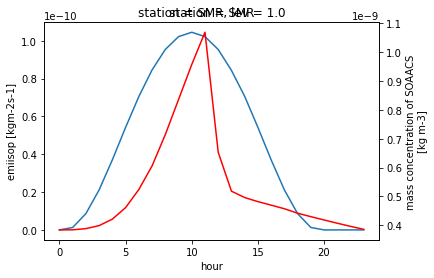

In [31]:
f, ax = plt.subplots()
ds_iso['emiisop'].groupby(ds_iso['hour']).mean().plot(ax = ax)
ax2 = ax.twinx()
ds_iso['M_SOAACS'].groupby(ds_iso['hour']).mean().isel(lev= 0).plot(ax = ax2, c='r')

### UKESM

In [32]:
case_name_ukesm = 'AEROCOMTRAJ'
case_name = case_name_ukesm
time_res = 'hour'
space_res = 'locations'
model_name = 'UKESM'

from_t = '2013-01-01'
to_t = '2019-01-01'

In [33]:
case_mod = case_name
cases_ukesm = [case_name]
di_mod2cases[model_name]=cases_ukesm

#### Variables

In [34]:
varl = [
    'Mass_Conc_OM_NS',

    'Mass_Conc_OM_KS',
    'Mass_Conc_OM_KI',
    'Mass_Conc_OM_AS',
    'Mass_Conc_OM_CS',
    'mmrtr_OM_NS',
    'mmrtr_OM_KS',
    'mmrtr_OM_KI',
    'mmrtr_OM_AS',
    'mmrtr_OM_CS',
    'nconcNS',
    'nconcKS',
    'nconcKI',
    'nconcAS',
    'nconcCS',
    'ddryNS',
    'ddryKS',
    'ddryKI',
    'ddryAS',
    'ddryCS',
    'Temp',
]

#### Read in UKESM:

In [35]:
for case_name in cases_ukesm:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

{'model_name': 'UKESM', 'history_field': '.h1.', 'use_pressure_coords': False}
got to check_if_load_raw_necessary
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_NS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KI_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_AS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_CS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc exists
C

In [36]:
dic_ds = dict()
for ca in cases_ukesm:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
        



    ds = c.get_collocated_dataset(varl)
    

    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    ds = ds.rename({'model_level':'lev'})
    dic_ds[ca]=ds.copy()

2023-03-09 08:59:21,333 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_NS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KI_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_AS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_CS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/mmrtr_OM_NS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc,

{'model_name': 'UKESM', 'history_field': '.h1.', 'use_pressure_coords': False}
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_NS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KI_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_AS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_CS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/mmrtr_OM_NS_AEROCOMTRAJ_2013-01-01_2019-0

In [37]:
dic_mod_ca['UKESM'] = dic_ds.copy()

In [38]:
_ds = dic_mod_ca['UKESM'][case_name_ukesm].sel(station='SMR')

In [39]:
_ds['hour'] = _ds['time.hour']
_ds

<xarray.Dataset>
Dimensions:          (time: 17776, lev: 85)
Coordinates:
  * time             (time) datetime64[ns] 2013-01-01 ... 2019-01-31T21:00:00
  * lev              (lev) float32 1.0 2.0 3.0 4.0 5.0 ... 82.0 83.0 84.0 85.0
    station          <U3 'SMR'
Data variables: (12/22)
    Mass_Conc_OM_AS  (time, lev) float32 dask.array<chunksize=(17776, 85), meta=np.ndarray>
    Mass_Conc_OM_CS  (time, lev) float32 dask.array<chunksize=(17776, 85), meta=np.ndarray>
    Mass_Conc_OM_KI  (time, lev) float32 dask.array<chunksize=(17776, 85), meta=np.ndarray>
    Mass_Conc_OM_KS  (time, lev) float32 dask.array<chunksize=(17776, 85), meta=np.ndarray>
    Mass_Conc_OM_NS  (time, lev) float32 dask.array<chunksize=(17776, 85), meta=np.ndarray>
    Temp             (time, lev) float32 dask.array<chunksize=(17776, 85), meta=np.ndarray>
    ...               ...
    nconcAS          (time, lev) float32 dask.array<chunksize=(17776, 85), meta=np.ndarray>
    nconcCS          (time, lev) float32 dask.array<chunksize=(17776, 85), meta=np.ndarray>
    nconcKI          (time, lev) float32 dask.array<chunksize=(17776, 85), meta=np.ndarray>
    nconcKS          (time, lev) float32 dask.array<chunksize=(17776, 85), meta=np.ndarray>
    nconcNS          (time, lev) float32 dask.array<chunksize=(17776, 85), meta=np.ndarray>
    hour             (time) int64 0 3 6 9 12 15 18 21 0 ... 0 3 6 9 12 15 18 21

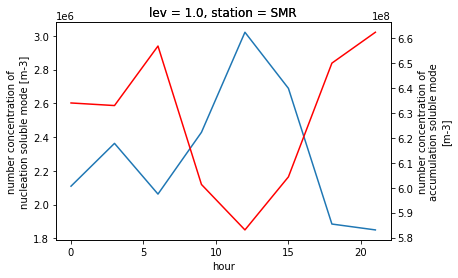

In [40]:
f, ax = plt.subplots()
_ds['nconcNS'].groupby(_ds['hour']).mean().isel(lev= 0).plot(ax = ax)
ax2 = ax.twinx()
_ds['nconcAS'].groupby(_ds['hour']).mean().isel(lev= 0).plot(ax = ax2, c='r')

### NORESM

#### Settings:

In [41]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [42]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [43]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

#### Cases:

In [44]:
cases_noresm1 = ['OsloAero_intBVOC_f09_f09_mg17_full']
cases_noresm2 = ['OsloAero_intBVOC_f09_f09_mg17_ssp245']

In [45]:
case_mod = 'OsloAero_intBVOC_f09_f09_mg17_fssp'
case_noresm = 'OsloAero_intBVOC_f09_f09_mg17_fssp'
cases_noresm = [case_noresm]
di_mod2cases['NorESM'] = cases_noresm

#### Variables

In [46]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T','SOA_SV',
       'NCONC01','N50','N150','N200',#'DOD500',
       #'DOD500',
      'isoprene',
      'SFisoprene',
       'monoterp',
       'SFmonoterp',
       'PS',
       #'hyam','hybm',
       #'hyai','hybi',
       
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

#### Read in NorESM

In [47]:
for case_name in cases_noresm1:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

{'history_field': '.h1.', 'use_pressure_coords': False}
got to check_if_load_raw_necessary
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Ou

In [48]:
for case_name in cases_noresm2:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

{'history_field': '.h1.', 'use_pressure_coords': False}
got to check_if_load_raw_necessary
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_s

In [49]:
dic_ds = dict()
for ca in cases_noresm1:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    #ds2 = c.get_collocated_dataset(['DOD500'])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2023-03-09 08:59:23,617 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01

{'history_field': '.h1.', 'use_pressure_coords': False}
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01

In [50]:
#dic_ds = dict()
for ca in cases_noresm2:
    c = CollocateLONLATout(ca, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2023-03-09 08:59:25,063 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09

{'history_field': '.h1.', 'use_pressure_coords': False}
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09

In [51]:
case1 = cases_noresm1[0]
case2 = cases_noresm2[0]

ds1 = dic_ds[case1]
ds2 = dic_ds[case2]

st_y = from_t.split('-')[0]
mid_y_t = str(int(to_t.split('-')[0])-1)
mid_y_f = to_t.split('-')[0]
end_y = to_t2.split('-')[0]

print(st_y, mid_y_t, mid_y_f, end_y)

2012 2014 2015 2019


In [52]:
_ds1 = ds1.sel(time=slice(st_y, mid_y_t))
_ds2 = ds2.sel(time=slice(mid_y_f, end_y))
ds_comb = xr.concat([_ds1, _ds2], dim='time')#.sortby('time')

In [53]:
dic_ds = {case_mod: ds_comb}

In [54]:
dic_mod_ca['NorESM'] = dic_ds.copy()

In [55]:
ds_comb

<xarray.Dataset>
Dimensions:     (time: 61345, station: 7, lev: 32)
Coordinates:
  * time        (time) datetime64[ns] 2012-01-02 ... 2019-01-01
  * station     (station) object 'SMR' 'HTM' 'VHL' 'BIR' 'ATTO' 'SGP' 'SMR4'
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
Data variables: (12/40)
    ACTREL      (station, time) float32 dask.array<chunksize=(7, 26280), meta=np.ndarray>
    BC_A        (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AC       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AI       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AX       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_N        (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    ...          ...
    SS_A1       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    SS_A2       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    SS_A3       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    T           (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    isoprene    (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    monoterp    (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>

## SELECT STATION:


In [56]:
for mod in dic_mod_ca.keys():
    print(mod)
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].sel(station=select_station)
        dic_mod_ca[mod][ca].load()

ECHAM-SALSA
EC-Earth
UKESM
NorESM


## Select level: 

In [57]:
for mod in dic_mod_ca.keys():
    if mod in ['EC-Earth', 'UKESM']:
        continue
    print(mod)
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].isel(lev=model_lev_i)
        dic_mod_ca[mod][ca].load()

ECHAM-SALSA
NorESM


In [58]:
for mod in dic_mod_ca.keys():
    if mod not in ['EC-Earth', 'UKESM']:
        continue
    print(mod)
    lev_i_tm5 = -model_lev_i-1
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].isel(lev=lev_i_tm5)
        if mod=='EC-Earth':
            dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].isel(lev_ifs=model_lev_i)
        dic_mod_ca[mod][ca].load()




EC-Earth
UKESM


TM5 has model levels going from the ground and up, IFS from the top and down. 

## Adjust ECHAM

In [59]:
rn_dict_echam={
    'ORG_mass_conc' : 'OA',
    'tempair':'T',

    
}

In [60]:
from bs_fdbck.util.BSOA_datamanip import calculate_daily_median_summer,calculate_summer_median, mask4summer,ds2df_echam

In [61]:
standard_air_density = 100*pressure/(R*temperature)

In [62]:
import datetime

### Fix echam time

In [63]:
def fix_echam_time(dt):
    #a, b = divmod(round(dt.minute, -1), 60)
    tdelta = datetime.timedelta(minutes=dt.minute, seconds = dt.second)
    #nh = (dt.hour+a)%24
    ndt = datetime.datetime(dt.year, dt.month,dt.day, dt.hour)#dt - tdelta
    #dt_o = datetime.datetime(dt.year,dt.month, dt.day, (dt.hour + a) % 24,b)
    return ndt

In [64]:
ds_echam = dic_mod_ca['ECHAM-SALSA'][case_name_echam]
air_dens = ds_echam['apm']/(R*ds_echam['tempair'])

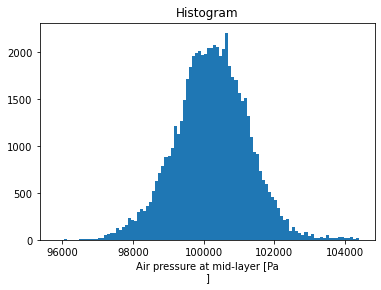

In [65]:
ds_echam['apm'].plot.hist(bins=100);

### Run ds2df_echam

#### Calculation with standard density and pressure:


In [66]:
from bs_fdbck.util.BSOA_datamanip import standard_air_density

In [67]:

df, df_sm = ds2df_echam(dic_mod_ca['ECHAM-SALSA'][case_name_echam], 
                        take_daily_median=False, 
                        air_density=standard_air_density,
                        model_lev_i =model_lev_i)
df.index = df.reset_index()['time'].apply(fix_echam_time)
df

Computing N3 from mmrtrN3
N3
Computing N50 from mmrtrN50
N50
Computing N100 from mmrtrN100
N100
Computing N200 from mmrtrN200
N200
Computing N250 from mmrtrN250
N250
Computing N500 from mmrtrN500
N500
Computing ORG_mass_conc from ORG_mass and convertign units
ORG_mass_conc
Computing VBS1_gas_conc from VBS1_gas and convertign units
VBS1_gas_conc
Computing VBS0_gas_conc from VBS0_gas and convertign units
VBS0_gas_conc
Computing VBS10_gas_conc from VBS10_gas and convertign units
VBS10_gas_conc
Computing OAG
Computing cwp by 
cwp
Converting units from lcdnc_ct


,lon,lev,station,APIN_gas,BPIN_gas,CARENE3_gas,ISOP_gas,LIMON_gas,MYRC_gas,ORG_mass,...,VBS10_gas_conc,OAG,cwp,ceff_um,lcdnc_cm3,lcdnc_ct_cm3,T_C,is_JJA,is_JA,isSummer
time,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,24.2896,47.0,SMR,1.361203e-11,1.195408e-11,8.112913e-12,6.094467e-13,7.643650e-12,1.722048e-12,1.059090e-10,...,0.002368,0.139519,256.340515,0.0,4.911462e-35,0.0,-5.690857,False,False,False
2012-01-01 01:00:00,24.2896,47.0,SMR,1.526825e-11,1.340976e-11,9.095198e-12,5.985267e-13,8.574262e-12,1.930941e-12,1.198592e-10,...,0.002255,0.157412,220.838120,0.0,8.720350e-35,0.0,-5.732605,False,False,False
2012-01-01 02:00:00,24.2896,47.0,SMR,2.012862e-11,1.768351e-11,1.196703e-11,5.865213e-13,1.130422e-11,2.542114e-12,1.652919e-10,...,0.002311,0.216194,192.647324,0.0,-6.989588e-36,0.0,-5.700928,False,False,False
2012-01-01 03:00:00,24.2896,47.0,SMR,2.654426e-11,2.332372e-11,1.576086e-11,5.750081e-13,1.490835e-11,3.349550e-12,2.306323e-10,...,0.002266,0.300581,166.926910,0.0,1.083489e-34,0.0,-5.572144,False,False,False
2012-01-01 04:00:00,24.2896,47.0,SMR,3.203289e-11,2.814790e-11,1.901204e-11,5.630599e-13,1.799283e-11,4.041667e-12,2.941777e-10,...,0.002129,0.382532,144.410721,0.0,7.350604e-35,0.0,-5.342072,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,24.2896,47.0,SMR,2.225506e-11,1.951626e-11,1.326462e-11,2.384533e-12,1.249081e-11,2.828762e-12,1.578346e-10,...,0.000642,0.204656,63.028210,0.0,2.940085e-35,0.0,-3.349548,False,False,False
2018-12-31 20:00:00,24.2896,47.0,SMR,2.359773e-11,2.072263e-11,1.407822e-11,1.931136e-12,1.326150e-11,3.002594e-12,9.555966e-11,...,0.000505,0.124034,76.085457,0.0,7.577885e-35,0.0,-3.048615,False,False,False
2018-12-31 21:00:00,24.2896,47.0,SMR,2.526455e-11,2.221320e-11,1.507039e-11,1.576099e-12,1.421139e-11,3.217937e-12,6.283594e-11,...,0.000346,0.081576,44.751438,0.0,7.247229e-35,0.0,-2.815002,False,False,False


<AxesSubplot:xlabel='time'>

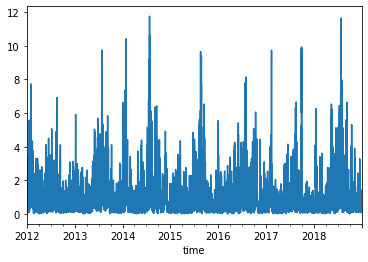

In [68]:
df['OA'].plot()

### Save result

In [70]:


_di = {case_name_echam:df}
_dism = {case_name_echam:df_sm}

dic_df_mod_case['ECHAM-SALSA']= _di.copy()
dic_dfsm_mod_case['ECHAM-SALSA'] = _dism.copy()

## Adjust EC-Earth:

In [71]:
ds_ec_earth = dic_mod_ca['EC-Earth'][case_name_ec_earth]

#### Check all data there: 

In [72]:
from bs_fdbck.util.BSOA_datamanip.ec_earth import rad_vars, num_vars

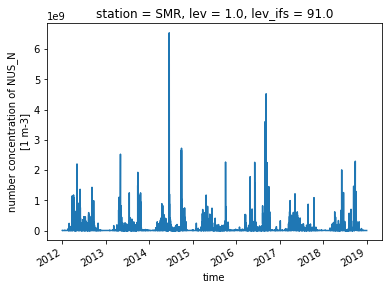

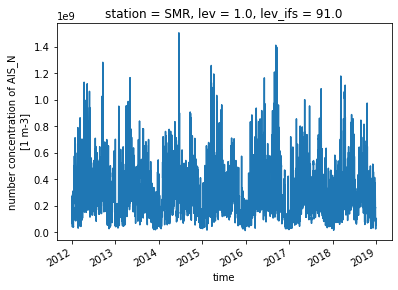

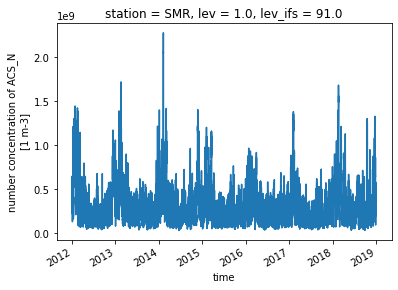

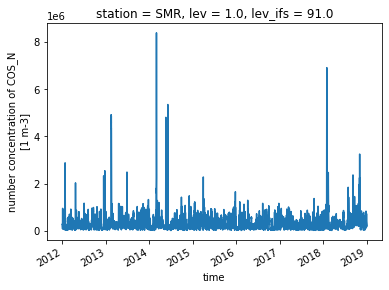

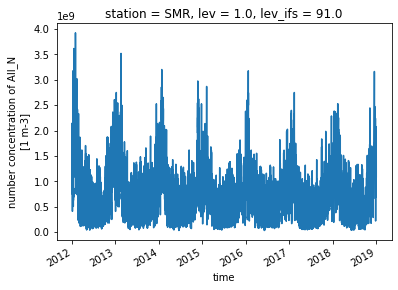

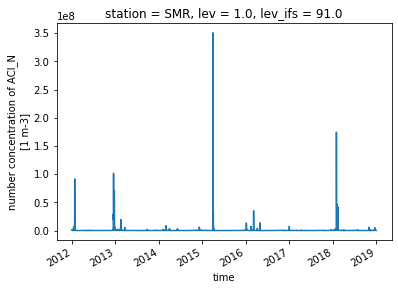

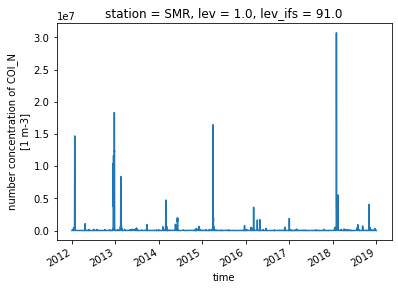

In [73]:
for n in num_vars:
    ds_ec_earth[n].plot()
    plt.show()

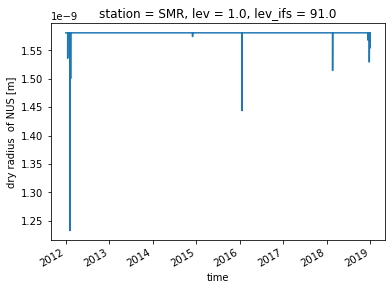

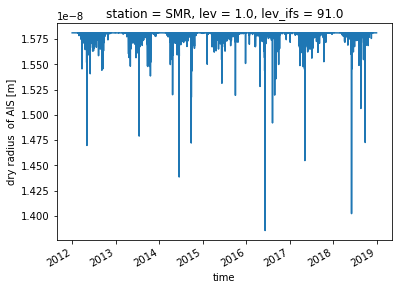

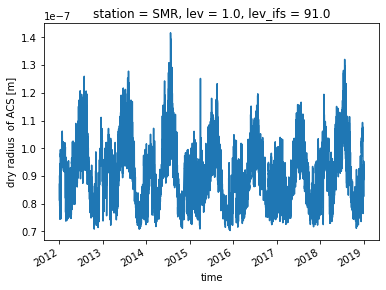

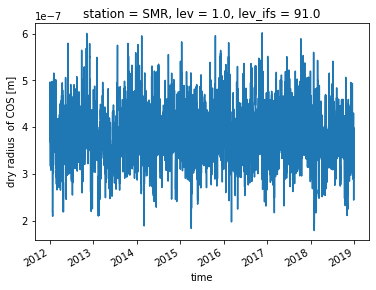

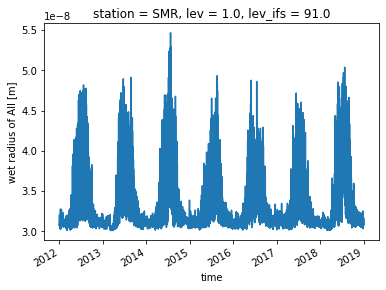

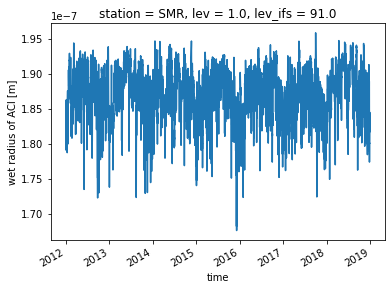

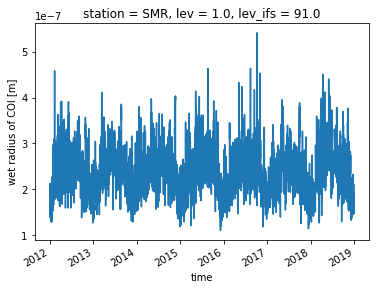

In [74]:
for n in rad_vars:
    ds_ec_earth[n].plot()
    plt.show()

In [75]:
from bs_fdbck.util.BSOA_datamanip.ec_earth import ds2df_ec_earth

In [76]:

df, df_sm = ds2df_ec_earth(ds_ec_earth, 
                        take_daily_median=False, 
                        #air_density=air_dens,
                        model_lev_i =model_lev_i)
#df.index = df.reset_index()['time'].apply(fix_echam_time)
df

Converting N_NUS from m-3 to cm-3
Converting N_AIS from m-3 to cm-3
Converting N_ACS from m-3 to cm-3
Converting N_COS from m-3 to cm-3
Converting N_AII from m-3 to cm-3
Converting N_ACI from m-3 to cm-3
Converting N_COI from m-3 to cm-3
Converting RDRY_NUS from m to nm
Converting RDRY_AIS from m to nm
Converting RDRY_ACS from m to nm
Converting RDRY_COS from m to nm
Converting RWET_AII from m to nm
Converting RWET_ACI from m to nm
Converting RWET_COI from m to nm
Converting M_SOANUS from kg/m3 to ug/m3
Converting M_POMAIS from kg/m3 to ug/m3
Converting M_SOAAIS from kg/m3 to ug/m3
Converting M_POMACS from kg/m3 to ug/m3
Converting M_SOAACS from kg/m3 to ug/m3
Converting M_POMCOS from kg/m3 to ug/m3
Converting M_SOACOS from kg/m3 to ug/m3
Converting M_POMAII from kg/m3 to ug/m3
Converting M_SOAAII from kg/m3 to ug/m3
renaming var130 to temp


,station,time_orig,lev,CCN0.20,CCN1.00,M_BCACS,M_BCAII,M_BCAIS,M_BCCOS,M_DUACI,...,N150-500,N200-500,OA,POM,SOA,SOA2,T_C,is_JJA,is_JA,isSummer
time,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,SMR,2012-01-01 00:30:00,1.0,210.349487,328.704193,1.312838e-10,1.760822e-10,6.468536e-13,5.554017e-16,2.331612e-10,...,196.935490,101.754681,1.813057,1.737373,0.075684,0.075684,NaN,False,False,False
2012-01-01 01:00:00,SMR,2012-01-01 01:30:00,1.0,238.479065,370.828125,1.479828e-10,2.002312e-10,5.436276e-13,6.121765e-16,2.344173e-10,...,224.057987,116.241666,2.074929,1.999963,0.074966,0.074966,NaN,False,False,False
2012-01-01 02:00:00,SMR,2012-01-01 02:30:00,1.0,264.209625,408.752502,1.637148e-10,2.224790e-10,5.254167e-13,6.354531e-16,2.355444e-10,...,249.143457,129.551621,2.320950,2.244422,0.076527,0.076527,NaN,False,False,False
2012-01-01 03:00:00,SMR,2012-01-01 03:30:00,1.0,289.251404,443.429291,1.786072e-10,2.429668e-10,5.675244e-13,6.503565e-16,2.366023e-10,...,273.240513,142.554836,2.553694,2.472160,0.081534,0.081534,-14.315735,False,False,False
2012-01-01 04:00:00,SMR,2012-01-01 04:30:00,1.0,313.352417,475.294556,1.927297e-10,2.617789e-10,6.486790e-13,6.622721e-16,2.375622e-10,...,296.305901,155.159277,2.774989,2.684082,0.090908,0.090908,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 20:00:00,SMR,2018-12-31 20:30:00,1.0,318.413849,394.142242,1.709785e-10,2.026840e-10,1.881653e-12,8.132766e-16,8.079349e-12,...,282.389702,166.922512,2.239892,2.182843,0.057050,0.057050,NaN,False,False,False
2018-12-31 21:00:00,SMR,2018-12-31 21:30:00,1.0,315.230042,389.781250,1.666865e-10,1.965827e-10,1.886738e-12,7.316220e-16,7.938763e-12,...,278.282500,164.681933,2.203162,2.145369,0.057793,0.057793,-2.202515,False,False,False
2018-12-31 22:00:00,SMR,2018-12-31 22:30:00,1.0,314.643311,388.998383,1.645214e-10,1.931307e-10,1.865770e-12,6.738140e-16,7.820041e-12,...,276.964682,163.941755,2.192743,2.133609,0.059134,0.059134,NaN,False,False,False


### Assuming standard pressure for EC-Earth (since we don't have this and the effect is marginal)

Converting by: 

\begin{align}
conc. OA_{amb}=\frac{m_{OA}}{V_{amb}} = & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{amb}} = w_{OA} \cdot \rho_{amb} 
\end{align}
and in the same way
\begin{align}
conc. OA_{STP}= & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{STP}} = w_{OA} \cdot \rho_{STP}
\end{align}

So finally
\begin{align}
conc. OA_{STP}= & conc. OA_{amb} \cdot \frac{\rho_{STP}}{\rho_{amb}}
\end{align}

In [77]:
from bs_fdbck.util.BSOA_datamanip import pressure_default, standard_air_density,R

In [78]:
df['T_C']

time
2012-01-01 00:00:00          NaN
2012-01-01 01:00:00          NaN
2012-01-01 02:00:00          NaN
2012-01-01 03:00:00   -14.315735
2012-01-01 04:00:00          NaN
                         ...    
2018-12-31 20:00:00          NaN
2018-12-31 21:00:00    -2.202515
2018-12-31 22:00:00          NaN
2018-12-31 23:00:00          NaN
2019-01-01 00:00:00    -0.752106
Name: T_C, Length: 61369, dtype: float32

In [79]:
df['density'] = 1e5/(R*(df['T_C']+273.15))

<AxesSubplot:xlabel='time'>

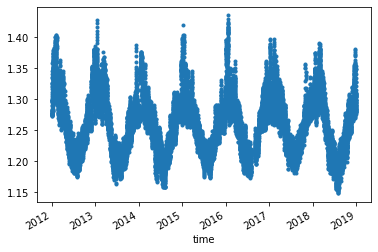

In [80]:
df['density'].plot(marker='.')

In [81]:
df['ambient2stp_correction_factor'] = (1/df['density'])*standard_air_density

In [82]:
vl = ['OA','N100','N200','N50']
for v in vl:
    if v in df:
        df = df.rename({v:f'{v}_amb'}, axis=1)
        df[f'{v}_STP'] = df[f'{v}_amb']*df['ambient2stp_correction_factor']
        print(f'converting {v}')

converting OA
converting N100
converting N200
converting N50


<AxesSubplot:xlabel='time'>

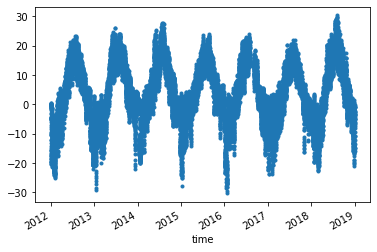

In [83]:
df['T_C'].plot(marker='.')#.columns#['Temperature'].plot()

<AxesSubplot:ylabel='Frequency'>

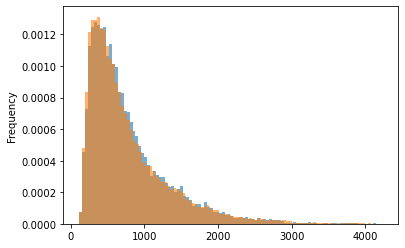

In [84]:
df['N50_STP'].plot.hist(alpha=0.6, bins=100, density=True)#.columns#['Temperature'].plot()
df['N50_amb'].plot.hist(alpha=0.6, bins=100, density=True)#.columns#['Temperature'].plot()

### Save result

In [85]:


_di = {case_name_ec_earth:df}
_dism = {case_name_ec_earth:df_sm}

dic_df_mod_case['EC-Earth']= _di.copy()
dic_dfsm_mod_case['EC-Earth'] = _dism.copy()

## Adjust UKESM:

In [86]:
ds_ukesm = dic_mod_ca['UKESM'][case_name_ukesm]

#### Check all data there: 

In [87]:
from bs_fdbck.util.BSOA_datamanip.ukesm import diam_vars, num_vars

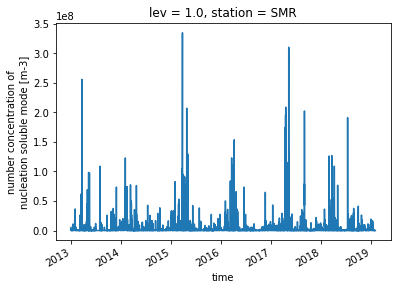

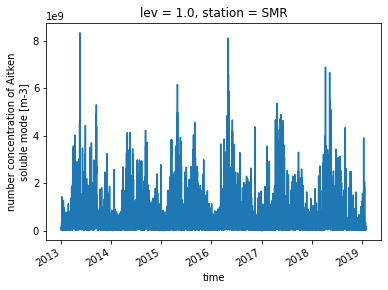

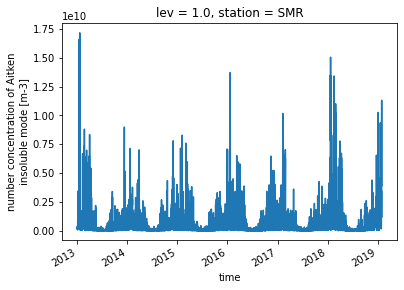

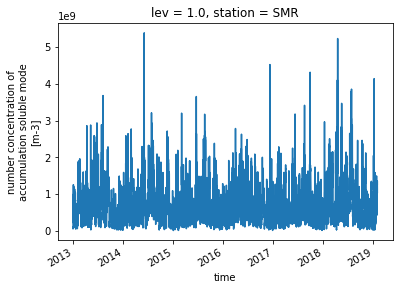

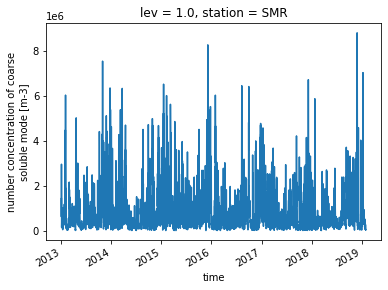

In [88]:
for n in num_vars:
    ds_ukesm[n].plot()
    plt.show()

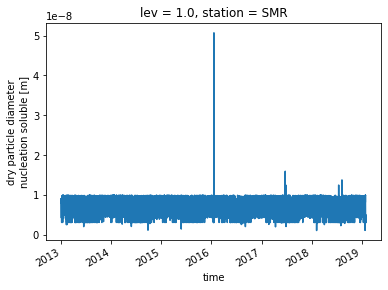

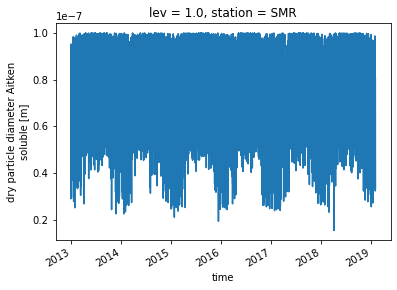

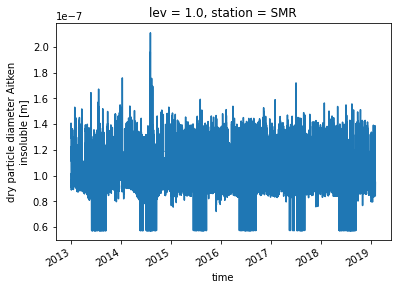

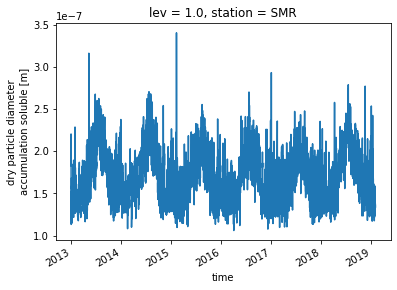

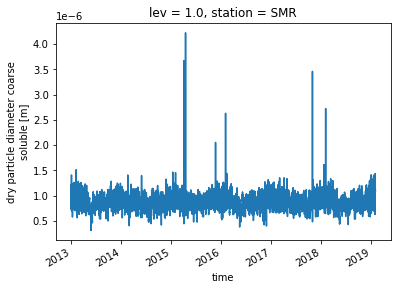

In [89]:
for n in diam_vars:
    ds_ukesm[n].plot()
    plt.show()

In [90]:
from bs_fdbck.util.BSOA_datamanip.ukesm import ds2df_ukesm

In [91]:

df, df_sm = ds2df_ukesm(ds_ukesm, 
                        take_daily_median=False, 
                        #air_density=air_dens,
                        model_lev_i =model_lev_i)
#df.index = df.reset_index()['time'].apply(fix_echam_time)
df

Converting nconcNS from m-3 to cm-3
Converting nconcKS from m-3 to cm-3
Converting nconcKI from m-3 to cm-3
Converting nconcAS from m-3 to cm-3
Converting nconcCS from m-3 to cm-3
Converting ddryNS from m to nm
Converting ddryKS from m to nm
Converting ddryKI from m to nm
Converting ddryAS from m to nm
Converting ddryCS from m to nm
Converting Mass_Conc_OM_NS from kg/m3 to ug/m3
Converting Mass_Conc_OM_KS from kg/m3 to ug/m3
Converting Mass_Conc_OM_KI from kg/m3 to ug/m3
Converting Mass_Conc_OM_AS from kg/m3 to ug/m3


,lev,station,Mass_Conc_OM_AS,Mass_Conc_OM_CS,Mass_Conc_OM_KI,Mass_Conc_OM_KS,Mass_Conc_OM_NS,T,ddryAS,ddryCS,...,N50-500,N70-500,N100-500,N150-500,N200-500,OA,T_C,is_JJA,is_JA,isSummer
time,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,1.0,SMR,0.029334,1.359598e-13,0.253145,0.000211,1.068879e-06,274.789551,182.989761,749.617126,...,302.831771,287.050559,243.673386,151.009369,76.332046,0.282691,1.639557,False,False,False
2013-01-01 03:00:00,1.0,SMR,0.020500,5.073263e-14,0.298489,0.000070,8.205633e-07,274.624512,203.022430,735.776978,...,257.350138,247.031990,215.257477,142.864787,79.629359,0.319059,1.474518,False,False,False
2013-01-01 06:00:00,1.0,SMR,0.014402,5.228740e-14,0.355188,0.000098,6.124729e-07,275.227295,220.427582,829.652954,...,408.592780,374.019775,291.858234,163.336780,83.652357,0.369688,2.077301,False,False,False
2013-01-01 09:00:00,1.0,SMR,0.255528,4.042748e-12,0.104935,0.012398,1.145155e-07,276.603516,179.792786,855.751221,...,418.167568,361.694577,293.527485,185.656607,93.727530,0.372861,3.453522,False,False,False
2013-01-01 12:00:00,1.0,SMR,0.338657,6.464898e-12,0.045099,0.013234,7.886742e-08,277.753662,160.773407,807.387085,...,475.684672,429.569817,365.733672,220.120926,97.082135,0.396990,4.603668,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-31 09:00:00,1.0,SMR,0.679269,4.332594e-14,4.314717,0.050344,0.000000e+00,252.034912,135.987152,1105.139038,...,11292.032693,8919.579958,5319.749707,1819.578625,558.527439,5.044330,-21.115082,False,False,False
2019-01-31 12:00:00,1.0,SMR,0.710606,4.707346e-14,2.070120,0.026826,0.000000e+00,254.503906,132.971573,1138.040894,...,5592.194640,4672.057085,3055.449015,1148.047453,362.370129,2.807551,-18.646088,False,False,False
2019-01-31 15:00:00,1.0,SMR,0.709438,3.724113e-14,1.924361,0.002053,0.000000e+00,253.864014,133.155365,1073.853271,...,5134.756239,4321.387940,2861.426108,1090.165294,346.347430,2.635852,-19.285980,False,False,False


### Assuming standard pressure for UKESM (since we don't have this and the effect is marginal)

Converting by: 

\begin{align}
conc. OA_{amb}=\frac{m_{OA}}{V_{amb}} = & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{amb}} = w_{OA} \cdot \rho_{amb} 
\end{align}
and in the same way
\begin{align}
conc. OA_{STP}= & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{STP}} = w_{OA} \cdot \rho_{STP}
\end{align}

So finally
\begin{align}
conc. OA_{STP}= & conc. OA_{amb} \cdot \frac{\rho_{STP}}{\rho_{amb}}
\end{align}

In [92]:
from bs_fdbck.util.BSOA_datamanip import pressure_default, standard_air_density,R

In [93]:
df['T_C']

time
2013-01-01 00:00:00     1.639557
2013-01-01 03:00:00     1.474518
2013-01-01 06:00:00     2.077301
2013-01-01 09:00:00     3.453522
2013-01-01 12:00:00     4.603668
                         ...    
2019-01-31 09:00:00   -21.115082
2019-01-31 12:00:00   -18.646088
2019-01-31 15:00:00   -19.285980
2019-01-31 18:00:00   -21.410736
2019-01-31 21:00:00   -22.993011
Freq: 3H, Name: T_C, Length: 17776, dtype: float32

In [94]:
df['density'] = 1e5/(R*(df['T_C']+273.15))

<AxesSubplot:xlabel='time'>

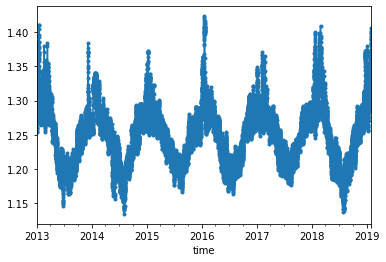

In [95]:
df['density'].plot(marker='.')

In [96]:
df['ambient2stp_correction_factor'] = (1/df['density'])*standard_air_density

In [97]:
vl = ['OA','N100','N200','N50']
for v in vl:
    if v in df:
        df = df.rename({v:f'{v}_amb'}, axis=1)
        df[f'{v}_STP'] = df[f'{v}_amb']*df['ambient2stp_correction_factor']
        print(f'converting {v}')

converting OA
converting N100
converting N200
converting N50


<AxesSubplot:xlabel='time'>

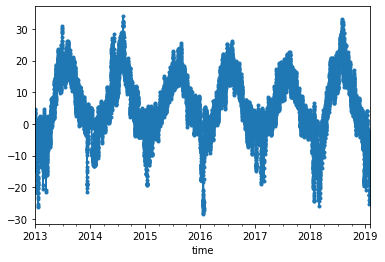

In [98]:
df['T_C'].plot(marker='.')#.columns#['Temperature'].plot()

<AxesSubplot:xlabel='time'>

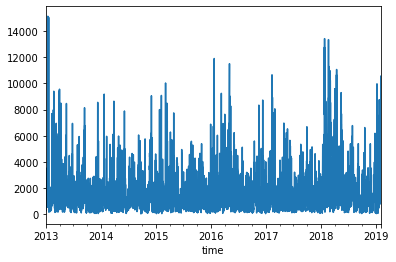

In [99]:
df['N50_STP'].plot()#.columns#['Temperature'].plot()

<AxesSubplot:ylabel='Frequency'>

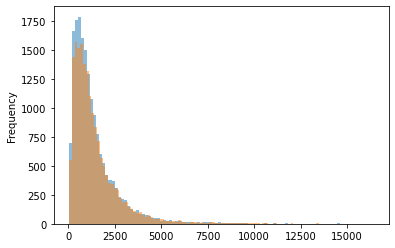

In [100]:
df['N50_amb'].plot.hist(bins=100, alpha=.5)#.columns#['Temperature'].plot()
df['N50_STP'].plot.hist(bins=100, alpha=.5)#.columns#['Temperature'].plot()

### Save result

In [101]:


_di = {case_name_ukesm:df}
_dism = {case_name_ukesm:df_sm}

dic_df_mod_case['UKESM']= _di.copy()
dic_dfsm_mod_case['UKESM'] = _dism.copy()

## Adjust NorESM

In [102]:
ds_noresm = dic_mod_ca['NorESM']['OsloAero_intBVOC_f09_f09_mg17_fssp']

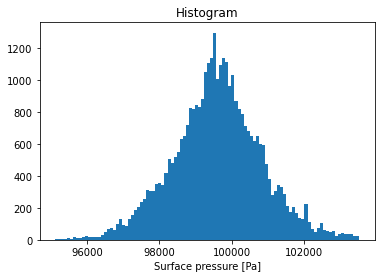

In [103]:
ds['PS'].sel(station=select_station).plot.hist(bins=100);

In [104]:
air_dens = ds_noresm['PS']/(R*ds_noresm['T'])

### Run ds2df NorESM

In [105]:
dic_df = ds2df_inc_preprocessing(dic_mod_ca['NorESM'], 
                                            model_lev_i=model_lev_i, 
                                            air_density=standard_air_density,
                                            select_hours_clouds=False,
                                            mask_cloud_values = False,
#                   from_hour=8,
#                   to_hour=14,
#                   varl_cl=None,
#                   varl_st = None,
          mask_summer = False,
                                            return_summer_median=False, 
                                            take_daily_median=False
                                )


dic_df_mod_case['NorESM'] = dic_df.copy()

hey
SO4_A1
SO4_A2
SO4_AC
SO4_NA
SO4_PR
df1


<AxesSubplot:xlabel='time'>

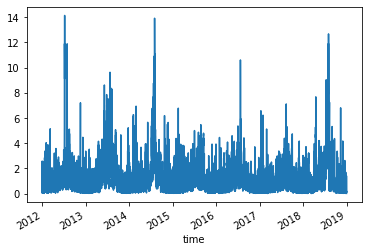

In [106]:
dic_df['OsloAero_intBVOC_f09_f09_mg17_fssp']['OA'].plot()

<AxesSubplot:xlabel='time'>

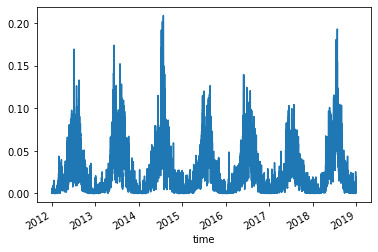

In [107]:
dic_df['OsloAero_intBVOC_f09_f09_mg17_fssp']['SOA_NA'].plot()

### NorESM needs correcting only for number concentrations

Converting by: 

\begin{align}
conc. OA_{amb}=\frac{m_{OA}}{V_{amb}} = & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{amb}} = w_{OA} \cdot \rho_{amb} 
\end{align}
and in the same way
\begin{align}
conc. OA_{STP}= & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{STP}} = w_{OA} \cdot \rho_{STP}
\end{align}

So finally
\begin{align}
conc. OA_{STP}= & conc. OA_{amb} \cdot \frac{\rho_{STP}}{\rho_{amb}}
\end{align}

In [108]:
from bs_fdbck.util.BSOA_datamanip import pressure_default, standard_air_density,R

In [109]:
df = dic_df_mod_case['NorESM'][case_noresm]

In [110]:
if 'OA' in df.columns:
    df = df.rename({'OA':'OA_STP'}, axis=1)

In [111]:
pressure = df['PS']
temperature = df['T_C']

In [112]:
df['density'] = pressure/(R*(temperature+273.15))

<AxesSubplot:xlabel='time'>

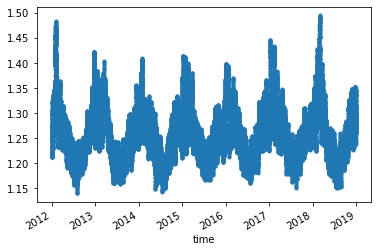

In [113]:
df['density'].plot(marker='.')

In [114]:
df['ambient2stp_correction_factor'] = (1/df['density'])*standard_air_density

In [115]:
vl = ['N100','N200','N50']
for v in vl:
    if v in df:
        df = df.rename({v:f'{v}_amb'}, axis=1)
        df[f'{v}_STP'] = df[f'{v}_amb']*df['ambient2stp_correction_factor']
        print(f'converting {v}')

converting N100
converting N200
converting N50


In [116]:
dic_df_mod_case['NorESM'][case_noresm] = df

## SHIFT TIME to local time: Easter european winter time EET UTC+2

In [117]:
import datetime

In [118]:
for mo in models:
    for ca in di_mod2cases[mo]:
        ind = dic_df_mod_case[mo][ca].index
        dic_df_mod_case[mo][ca].index = ind + datetime.timedelta(hours=2)

In [119]:
for mo in models:
    for ca in di_mod2cases[mo]:

        print(dic_df_mod_case[mo][ca].index[0:4])

DatetimeIndex(['2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex(['2012-01-02 02:00:00', '2012-01-02 03:00:00',
               '2012-01-02 04:00:00', '2012-01-02 05:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex(['2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex(['2013-01-01 02:00:00', '2013-01-01 05:00:00',
               '2013-01-01 08:00:00', '2013-01-01 11:00:00'],
              dtype='datetime64[ns]', name='time', freq='3H')


## Write to file:

In [120]:
for mod in models:
    print(mod)
    dic_df_mod_case[mod]
    for ca in dic_df_mod_case[mod].keys():
        print(mod, ca)
        fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        if model_lev_i !=-1:
            fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}_ilev{model_lev_i}.csv'
        else:
            fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        print(fn_out)
        dic_df_mod_case[mod][ca].to_csv(fn_out)

ECHAM-SALSA
ECHAM-SALSA SALSA_BSOA_feedback
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/SMR/SMR_station_ECHAM-SALSA_SALSA_BSOA_feedback.csv
NorESM
NorESM OsloAero_intBVOC_f09_f09_mg17_fssp
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/SMR/SMR_station_NorESM_OsloAero_intBVOC_f09_f09_mg17_fssp.csv
EC-Earth
EC-Earth ECE3_output_Sara
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/SMR/SMR_station_EC-Earth_ECE3_output_Sara.csv
UKESM
UKESM AEROCOMTRAJ
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/SMR/SMR_station_UKESM_AEROCOMTRAJ.csv


<AxesSubplot:xlabel='time'>

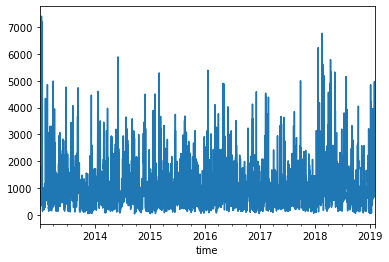

In [121]:
dic_df_mod_case[mod][ca]['N100_STP'].plot()